<a href="https://colab.research.google.com/github/Pesanas/ciencia-de-dados-adult/blob/master/ciencia_de_dados_adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1 - Importação de Bíbliotecas**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Step 2 - Carregar CSV da UCI Machine Learning Repository**

In [2]:
adult_kaggle = pd.read_csv('https://raw.githubusercontent.com/Pesanas/ciencia-de-dados-adult/master/adult%20kaggle.csv')
adult = pd.read_csv('https://raw.githubusercontent.com/Pesanas/ciencia-de-dados-adult/master/adult_csv.csv')
adult_bin = pd.read_csv('adult_binario.csv')

In [11]:
adult_bin.head(1)

,age,Private,Local-gov,Self-emp-not-inc,Federal-gov,State-gov,Self-emp-inc,Without-pay,Never-worked,fnlwgt,11th,HS-grad,Assoc-acdm,Some-college,10th,Prof-school,7th-8th,Bachelors,Masters,Doctorate,5th-6th,Assoc-voc,9th,12th,1st-4th,Preschool,educational-num,Never-married,Married-civ-spouse,Widowed,Divorced,Separated,Married-spouse-absent,Married-AF-spouse,Unnamed: 34,Machine-op-inspct,Farming-fishing,Protective-serv,Other-service,Prof-specialty,...,Mexico,Dominican-Republic,Ireland,Germany,Philippines,Thailand,Haiti,El-Salvador,Puerto-Rico,Vietnam,South,Columbia,Japan,India,Cambodia,Poland,Laos,England,Cuba,Taiwan,Italy,Italy.1,Canada,Portugal,China,Nicaragua,Honduras,Iran,Scotland,Jamaica,Ecuador,Yugoslavia,Hungary,Hong,Greece,Trinadad&Tobago,Outlying-US(Guam-USVI-etc),France,Holand-Netherlands,income
0,25,1,0,0,0,0,0,0,0,226802,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Tomada de Decisão 1:**

Como o filme de 2004 "13 Going On 30" defendia, 30 é a idade do sucesso, com essa afirmação vamos começar um aquecimento com gráficos:
 
Quantidade de pessoas que conseguiram fazer 50 mil ao ano com de 30 anos de idade em relação às outras idades:

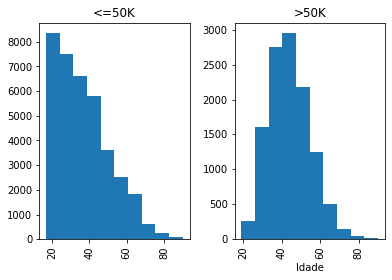

In [ ]:
adult_kaggle.hist(column='age',by='income')
plt.xlabel('Idade')
plt.show()

Conclusão:
 
De acordo com o gráfico gerado através do dataset disponibilizado pela UCI, a idade do sucesso está mais para 50 anos de idade.

#**Tomada de Decisão 2:**

Andrey Rayanovsky nascido na Rússia, vivenciou a Revolução Russa em 1917 e viu a União Soviética se tornar o primeiro país socialista do mundo, Andrey não apoiava o socialismo pois defendia que grandes homens podem traçar seu próprio caminho, revoltado com a situação de seu país mudou seu nome para Andrew Ryan e migrou para os Estados Unidos, Andrew defende inclusive que você não pode depender de outra pessoa, um parceiro, e deve traçar seu caminho você próprio, com essa afirmação vamos analisar o gráfico a seguir:
 
Quantidade de pessoas que conseguiram fazer 50 mil ao ano solteiras, em relação a quantidade de pessoas que conseguiram fazer 50 mil ao ano casadas:

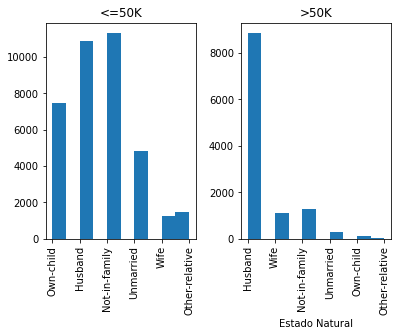

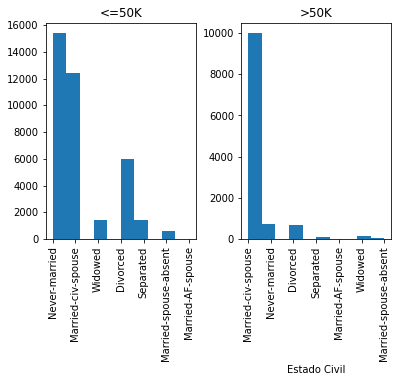

In [ ]:
adult_kaggle.hist(column='relationship',by='income')
plt.xlabel('Estado Natural')
adult_kaggle.hist(column='marital-status',by='income')
plt.xlabel('Estado Civil')
plt.show()

Conclusão:
 
De acordo com os gráfico gerados, Andrew Ryan está completamente errado em sua filosofia, uma vez que menos de 1.000 pessoas solteiras fizeram 50 mil ao ano, contra quase 10.000 casados que conseguiram o feito.

Curiosidade:
 
Graças aos gráficos sobre "Estado Natural", percebemos que existe algo destacado nos gráficos de "Estado Civil", a quantidade de homens no dataset é enorme, então decidimos calcular a quantidade de homens e mulheres registradas e encontrar um possível motivo para isso:

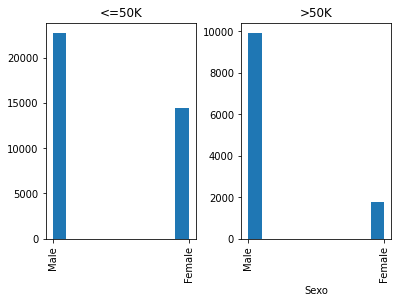

In [ ]:
adult_kaggle.hist(column='gender',by='income')
plt.xlabel('Sexo')
plt.show()

Curiosidade:
 
Analisando a documentação, descobrimos que o dataset se trata apenas dos Estados Unidos, no ano de 1994, usando ferramentas do Google de cálculo de população mundial, hoje em 2020 existem mais mulheres do que homens no mundo, mas no ano de 1994 a proporção está correta, uma impressão que chamou nossa atenção durante o desenvolvimento dessa atividade porém nada além disso.

#**Tomada de Decisão 3:**

#**Machine Learning:**

#***ESSA LINHA PARA BAIXO É TESTE!***

In [ ]:
adult_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
adult_kaggle.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


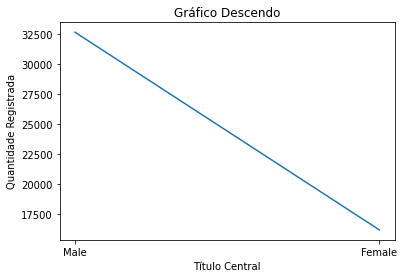

In [ ]:
plt.plot(adult_kaggle['gender'].value_counts())
plt.title('Gráfico Descendo')
plt.xlabel('Título Central')
plt.ylabel('Quantidade Registrada')
plt.show()

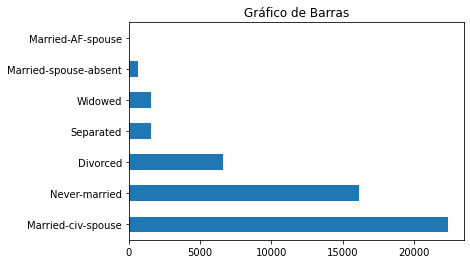

In [ ]:
adult['marital-status'].value_counts().plot.barh(stacked=True)
plt.title('Gráfico de Barras')
plt.show()

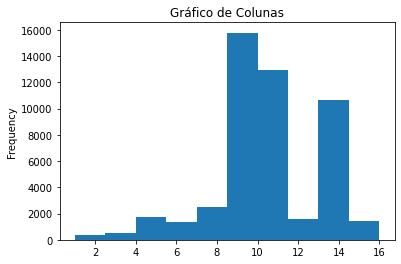

In [ ]:
adult['education-num'].plot(kind='hist')
plt.title('Gráfico de Colunas')
plt.show()

### **Árvore de Classificação** 

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le =LabelEncoder()

In [37]:
for col in adult_kaggle.columns:
      if adult_kaggle[col].dtypes=='object':
           adult_kaggle[col] = le.fit_transform(adult_kaggle[col])

In [44]:
from sklearn.model_selection import train_test_split

X = adult_kaggle[adult_kaggle.columns[0:13]].to_numpy()
y = adult_kaggle['income'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123)

In [45]:
X

array([[    25,      4, 226802, ...,      0,      0,     40],
       [    38,      4,  89814, ...,      0,      0,     50],
       [    28,      2, 336951, ...,      0,      0,     40],
       ...,
       [    58,      4, 151910, ...,      0,      0,     40],
       [    22,      4, 201490, ...,      0,      0,     20],
       [    52,      5, 287927, ...,  15024,      0,     40]])

In [46]:
y

array([0, 0, 1, ..., 0, 0, 1])

In [47]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [48]:
clf.score(X_train,y_train)

0.8258851792197865

In [49]:
clf.score(X_test,y_test)

0.8280239128654492

In [50]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=2,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [51]:
clf.score(X_train,y_train)

0.28811903945856265

In [52]:
clf.score(X_test,y_test)

0.29300496916267527

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=10, random_state=123)
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [5]:
from sklearn.linear_model import SGDRegressor

clf = SGDRegressor(loss='squared_loss', learning_rate='constant', max_iter=10,
                   eta0=0.01, verbose=1, tol=None, random_state=123)

clf.fit(X_train, y_train)

-- Epoch 1
Norm: 1603822540225159.00, NNZs: 103, Bias: 1489995690748.405762, T: 36631, Avg. loss: 63696807232923364020098749964216038326272.000000
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 2119958676329095.50, NNZs: 103, Bias: 2519995690748.405762, T: 73262, Avg. loss: 61890281812952058590859344799923062177792.000000
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 2832087226549017.50, NNZs: 103, Bias: 829995690748.405762, T: 109893, Avg. loss: 62466416467013604211142209973530549813248.000000
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 2876178269510358.00, NNZs: 103, Bias: 1299995690748.405762, T: 146524, Avg. loss: 62440376171466610665431926979326245863424.000000
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 3408906878699395.00, NNZs: 103, Bias: 969995690748.405762, T: 183155, Avg. loss: 62269368270263708803881623126295760076800.000000
Total training time: 0.10 seconds.
-- Epoch 6
Norm: 2147828698712433.00, NNZs: 103, Bias: 699995690748.405762, T: 219786, Av

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=10,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=123,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [6]:
clf.score(X_train,y_train)

-7.061598033856085e+40

In [7]:
clf.score(X_test,y_test)

-7.022989988330384e+40

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = clf.predict(X_test)

print(f"Acurácia de Teste: ±{mean_absolute_error(y_test, y_pred):1.0f}")

Acurácia de Teste: ±98502962380426002432


A saída de streaming foi truncada nas últimas 5000 linhas.
Total training time: 0.12 seconds.
-- Epoch 5
Norm: 169490121956430688.00, NNZs: 103, Bias: -115932887327473.437500, T: 183155, Avg. loss: 432937198532361694515038464700053407603359744.000000
Total training time: 0.14 seconds.
-- Epoch 6
Norm: 65511905469187408.00, NNZs: 103, Bias: -211823797327473.437500, T: 219786, Avg. loss: 429525815509461834774672725790877368323145728.000000
Total training time: 0.16 seconds.
-- Epoch 7
Norm: 154036039984753824.00, NNZs: 103, Bias: -269358343327473.437500, T: 256417, Avg. loss: 430890391238877307778016528091880320172818432.000000
Total training time: 0.18 seconds.
-- Epoch 8
Norm: 242055775795411264.00, NNZs: 103, Bias: -143449409327473.437500, T: 293048, Avg. loss: 424938760669981268516412287240044418271543296.000000
Total training time: 0.20 seconds.
-- Epoch 9
Norm: 258123553564860288.00, NNZs: 103, Bias: -134277235327473.437500, T: 329679, Avg. loss: 43229877351706452620784600419213958

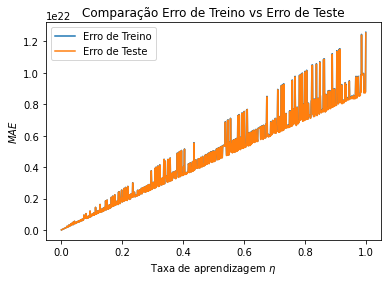

In [9]:
# inicia duas listas vazias
mae_train_values = []
mae_test_values = []

# Eixo X do grafico
x_axis = np.linspace(1e-6, 1, 1000)

for i in x_axis:
    clf =  clf.set_params(eta0=i)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_train_values.append(mae_train)
    
    y_test_pred = clf.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mae_test_values.append(mae_test)
    

plt.plot(x_axis, mae_train_values, label='Erro de Treino')
plt.plot(x_axis, mae_test_values, label='Erro de Teste')
plt.xlabel('Taxa de aprendizagem $\eta$')
plt.ylabel('$MAE$')
plt.legend()
plt.title('Comparação Erro de Treino vs Erro de Teste')
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder



In [11]:
le =LabelEncoder()

In [16]:
for col in adult_kaggle.columns:
      if adult_kaggle[col].dtypes=='object':
           adult_kaggle[col] = le.fit_transform(adult_kaggle[col])

In [18]:
adult_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int64
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int64
 6   occupation       48842 non-null  int64
 7   relationship     48842 non-null  int64
 8   race             48842 non-null  int64
 9   gender           48842 non-null  int64
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int64
 14  income           48842 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


In [21]:
from sklearn.model_selection import train_test_split

X1 = adult_kaggle[adult_kaggle.columns[0:13]].to_numpy()
y1 = adult_kaggle['income'].to_numpy()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,
                                                    test_size=0.25,
                                                    random_state=123)

In [22]:
X1

array([[    25,      4, 226802, ...,      0,      0,     40],
       [    38,      4,  89814, ...,      0,      0,     50],
       [    28,      2, 336951, ...,      0,      0,     40],
       ...,
       [    58,      4, 151910, ...,      0,      0,     40],
       [    22,      4, 201490, ...,      0,      0,     20],
       [    52,      5, 287927, ...,  15024,      0,     40]])

In [23]:
y1

array([0, 0, 1, ..., 0, 0, 1])

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=6,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X1_train, y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [33]:
clf.score(X1_train,y1_train)

0.8562146815538751

In [34]:
clf.score(X1_test,y1_test)

0.8545573663090656